<a href="https://colab.research.google.com/github/SDS-AAU/ASEX22/blob/main/AS2021_reeks_final_vejl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Re-Eksamen: Anvendt Statistik 2021
### Aalborg University Business School, HA 1. Semester
#### Roman Jurowetzki; 5. Januar 2022

#### Rules of the game:

- Don't panic! - Hvis koden ikke virker (men virkede før). Gå tilbage, og kør oppefra ned. Også en god ide at tjekke, at koden er fejlfri ved at gøre denne øvelse undervejs.
- Du må gerne bruge hjælpemidler og det forventes, at du kan slå funktioner op (f.eks: https://seaborn.pydata.org/api.html eller https://pandas.pydata.org/docs/reference/index.html#api)
- LÆS!!! hvad der står og hvad du forventes at lave!
- De fleste kodefejl er dumme stavefejl. Vær omhyggelig med kommaer, punktummer etc.
- Hvis der er noget, som slet ikke kan løses, så kan du bare kommentere ud med `#`
- Husk, at output skal kunne ses (f.eks. dine plots)
- Play fair og lad være med at snyde! - Gruppearbejde er absolut IKKE tilladt.
- Tjek AAU mail mht. mulige opdateringer fra undervisere undervejs
- Brug kun objektnavne, der blev defineret i opgaven
- Der afleveres som 👉 `ipynb` (**ikke PDF!**) - dvs, du skal bare downloade den fil, du arbejder med fra colab, eller bare aflevere den ipynb fil som du har åbent i Jupyter Lab.

In [ ]:
# Importér pakker og indstillinger til plotting

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

# US Arbejdsmarked 1980 og COVID Vacciner 2021

![](https://source.unsplash.com/FyvE6XPs5gk)

Data som skal undersøges ved brug af beskrivende statistik kommer fra 2 kilder:
* Data1: Angrist and Krueger (1991) “Does Compulsory School Attendance Affect Schooling and Earnings?” The Quarterly Journal of
Economics (1991)

* Data2: CSCs COVID-19 Vaccinations in the United States [COVID DATA TRACKER](https://covid.cdc.gov/covid-data-tracker/) (20/12 2021)

I den første del af opgaven skal du forberede og analysere det første datasæt. Til sidst skal dette føres sammen med vaccine data for at se, om data, der beskriver US stater for over 40 år siden, muligvis stadigvæk kan forklare nogle mønstre i vaccinetilslutning idag.

**Data 1: Besvarelser fra 82377 individer, 1980**


| **Variable** | **Beskrivelse**                               |
|----------|-------------------------------------------|
| ageq     | alder inkl. kvartal                       |
| edu      | højeste klassetrin afsluttet              |
| logwage  | logaritme af indkomst/uge (\$)             |
| married  | gift:1, ellers:0                          |
| state    | US Delstat, FIPS kode                     |
| black    | sort:1, ellers:0                          |
| smsa     | arbejder i "metropolitan area":1 ellers 0 |
| yob      | fødselsår                                 |
| wage     | indkomst/uge (\$)                          |

**Data 2: Vaccinetal/100k i delstater inkl. øer**

* Vacciner givet til voksne per 100k inkl. alle stik og booster.
* Delstat navn og FIPS code

Du skal arbejde med 2 filer:
- `data1.csv`
- `data2.csv`

Filerne findes også på:

- `https://github.com/SDS-AAU/ASEX22/raw/main/data1.csv`
- `https://github.com/SDS-AAU/ASEX22/raw/main/data2.csv`



In [ ]:
# 1.1
# Brug pandas til at åbne datafiler (ingen zip, ingen specielle sep indstillinger)
df = pd.read_csv('https://github.com/SDS-AAU/ASEX22/raw/main/data1.csv')

In [ ]:
# 1.2
# Inspicér de første 5 rækker i datasættet
df.head()

,ageq,edu,logwage,married,state,black,smsa,yob,wage
0,45.25,7.0,4.690818,1,22,0,1,1934,108.942258
1,46.25,15.0,6.001272,1,8,0,1,1933,403.942281
2,40.25,12.0,5.874553,0,29,0,1,1939,355.865553
3,41.00,17.0,6.175587,0,45,0,1,1939,480.865209
4,50.00,11.0,5.953992,1,9,0,1,1930,385.288344


In [ ]:
# Print info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82377 entries, 0 to 82376
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ageq     82377 non-null  float64
 1   edu      82355 non-null  float64
 2   logwage  82335 non-null  float64
 3   married  82377 non-null  int64  
 4   state    82377 non-null  int64  
 5   black    82377 non-null  int64  
 6   smsa     82377 non-null  int64  
 7   yob      82377 non-null  int64  
 8   wage     82335 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 5.7 MB


In [ ]:
# 1.2 Vis antal af manglende observationer for alle variable
df.isnull().sum()

ageq        0
edu        22
logwage    42
married     0
state       0
black       0
smsa        0
yob         0
wage       42
dtype: int64

In [ ]:
# 1.3
# Drop observationer hvor der mangler 'edu'; 
df.dropna(subset=['edu'], axis=0, inplace=True)

In [ ]:
# 1.4
# Brug gennemsnit for 'wage' til at udfylde de manglende værdier for 
# samme variable. Du kan beregne gennemsnit for 'wage' først eller 
# lave det hele i et skridt

df['wage'].fillna(df['wage'].mean(), inplace=True)

In [ ]:
# 1.5 
# Beregn beskrivende statistikker, inkl. min/max/percentiler/standardafvigelse mm.
# for df['wage']

df['wage'].describe()

count    82355.000000
mean       438.992204
std        374.210774
min          0.096154
25%        280.200103
50%        385.096133
75%        520.937462
max      37500.142052
Name: wage, dtype: float64

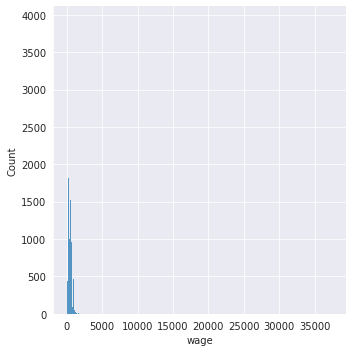

In [ ]:
# Plot histogram for df['wage']
sns.displot(df['wage'])

Brug fordelingen af `wage` variablen til at fjerne ekstreme værdier (outliers).
Brug interkvartilområde (interquartile range, IQR) $Q_3-Q_1$ og 3. kvartil til at beregne den øvere begrænsning $Q_3 + 1.5*IQR$.

OBS:
$Q_1$ = 25 percentil
$Q_3$ = 75 percentil

In [ ]:
# 1.6
# Beregn IQR - Q3-Q1: 'iqr'
iqr = df['wage'].quantile(0.75) - df['wage'].quantile(0.25)

In [ ]:
# Beregn øvre begrænsning Q3+1.5*IQR: 'upper_bound'
upper_bound = df['wage'].quantile(0.75) + iqr

In [ ]:
# 1.7
# Brug upper_bound til at fjerne outliers
# dvs. ingen observationer, hvor df['wage'] >= upper_bound
# Lav ger en ny dataframe: 'df_clean'

df_clean = df[df['wage'] < upper_bound]

In [ ]:
# 1.8
# Hvor mange observationer (% af dataframe df) bliver fjernet?
# du kan bruge 'len' funktionen til at se antal af observationer i en dataframe
(len(df) - len(df_clean))/len(df) * 100

8.090583449699471

👉 **Brug `df_clean` i alle analyser herfra**

In [ ]:
# 1.9
# Beregn beskrivende statistikker (automatisk funktion), inkl. min/max/percentiler/standardafvigelse mm.
# for 'wage' i den nye dataframe df_clean
df_clean['wage'].describe()

count    75692.000000
mean       378.605342
std        156.881598
min          0.096154
25%        269.326931
50%        380.300413
75%        480.865209
max        761.634666
Name: wage, dtype: float64

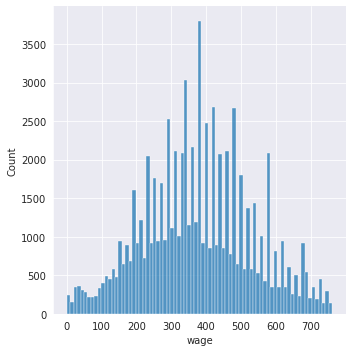

In [ ]:
# plot et histogram for df_clean['wage']
sns.displot(df_clean['wage'])

Forklar begrebet `standardafvigelse` (matematisk samt fortolkning i vores eksempel). Hvorfor er værdien mere end halveret, hvis vi sammenligner resultatet fra 1.5 og 1.9?

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/98f02417b7c2830d941364f6b40e22ea63a9dd1f)
- Standardafvigelse er kvardratroden af summen af xi-mu(gennemsnit) divideret med N
- Standradafvigelse beskriver et standartiseret mål af spredning
- Standardafvigelsen reduceres, da vi fjerner outliers, hvilke medfører en del høje Xi-mu værdier


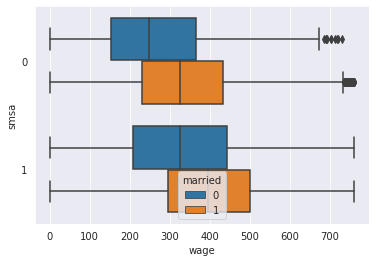

In [ ]:
# 2.1
# Lav boxplot af df_clean['wage'] vs 'smsa' (y) og 'married' som farve
sns.boxplot(data = df_clean, x='wage', y='smsa', hue='married', orient='h')

Hvad kan du observere?

- Fordeling gift/ikke gift: højere gennemsnit for gift, lignende spredning
- SMSA 1/0: højere niveauer, fordeling for både gift/ikke-gift; der er flere ourliers for SMSA==0, muligvis grundet højere N

In [ ]:
# 2.2 
# Lav krydstabel for 'married' vs 'black', vis relative værdier 
# (horizontal sum af rækker/index = 1)
pd.crosstab(df_clean['black'], df_clean['married'], normalize='index')

married,0,1
black,,
0,0.129442,0.870558
1,0.263198,0.736802


andel af sorte, som er gift: 0.74

In [ ]:
# 2.3 
# Inddel observationerne i 3 kategorier mht. uddannelsesniveau
# 0-11: low; 12-13: med; 14+: high

# OBS: den øvre grænse er inkluderet pga. right=True
# dvs [0,11] --> 0-11; ikke 0-10
# der kan komme en "SettingWithCopyWarning" hvilket ikke er en fejl.

levels = [0, 11, 13, 50] # grænser
names = ['low','med','high'] # navne til kategorier

df_clean['edu_cat'] = pd.cut(df_clean['edu'], bins=levels, labels=names, right=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [ ]:
# Lav krydstabel for 'edu_cat' vs 'smsa'
# vis relative værdier (vertikal sum per kolonne = 1)

pd.crosstab(df_clean['edu_cat'], df_clean['smsa'], normalize='columns')

smsa,0,1
edu_cat,,
low,0.314071,0.223764
med,0.468754,0.446441
high,0.217175,0.329795


Fortolk resultater mht. forskelle i fordelingen af uddannelsesniveauer i urbane og landlige områder.

- flere højuddannede i urbane områder
- flere lavt uddannede på landet
- flere med mellemhøje uddannelser på landet

In [ ]:
# 2.4
# Lav en ny Dataframe "df_flms" kun med observationer fra 
# Florida (12) og Massachusetts (25)

df_flms = df_clean[df_clean['state'].isin([12,25])]

In [ ]:
# hvor mange observationer er der for hver af de 2 stater (i den nye dataframe df_flms)?
df_flms['state'].value_counts()

25    2233
12     896
Name: state, dtype: int64

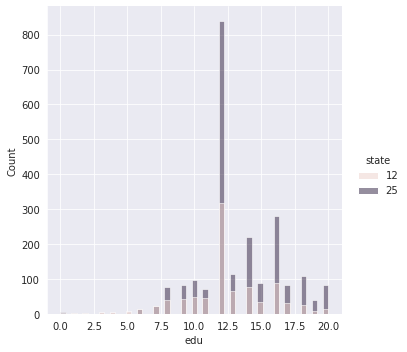

In [ ]:
# histogram / sns.displot funktion af 'edu' med state som farveinddeling
sns.displot(data = df_flms, x='edu', hue='state', kind='hist')

Kort fortolkning af, hvad histogrammet viser:

- Massachusetts har næsten ingen observationer uden uddannelse (edu < 7.5)
- Andele ligner henanden mellem 7.5 og 13. 
- 13+ har Mass. konsistent højere andele af observationer.

👉 **Brug `df_clean` igen herfra**

In [ ]:
# 2.5
# Beregn korrelation af 'wage' og 'edu'
df_clean['wage'].corr(df_clean['edu'])

0.3515496193887311

Giv en kort definition af korrelationskoefficienten og fortolk resultatet:

- R (korrelationskoefficienten) er en statistik, som beskriver sammenhæng mellem 2 variabler (ikke kausalitet). 
- Værdier går fra -1 til 1, hvor -1 betyder perfekt negativ sammenhæng, 0 ikke noget sammenhæng og 1 positiv sammenhæng.

0.35 her betyder, at der er moderat positiv sammenhæng, dvs. indkomst går op med uddannelsesniveaut (on average).

In [ ]:
# 2.6
# Lav en ny dataframe "state_mean", hvor der beregnes gennemsnitsværdier 
# for "wage", "black" og "smsa" for hver US delstat 'state'
state_mean = df_clean.groupby('state')[['wage','black','smsa']].mean()

In [ ]:
# Beregn korellation "wage" vs "smsa" på delstatsniveau
state_mean['wage'].corr(state_mean['smsa'])

0.2357666566226461

In [ ]:
# Beregn korellation "wage" vs "black" på delstatsniveau
state_mean['wage'].corr(state_mean['black'])

-0.622844544437326

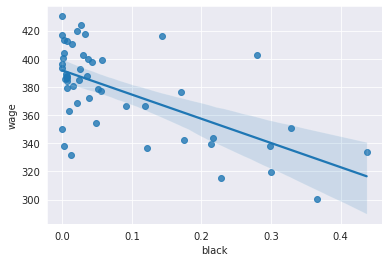

In [ ]:
# 2.7
# Lav en visualisering: "black" vs wage" med et seaborn regplot 
# (sns.regplot funktion - udviddet scatterplot) på delstatsniveau
sns.regplot(x = state_mean['black'], y = state_mean['wage'])

Fortolk din visualisering: 

- De fleste stater har en lav andel af sort befolkning.
- I de stater, hvor andelen er højere, er gennemsnintsløn lavere.

In [ ]:
# Indlæs vaccinedata
vaccines = pd.read_csv('https://github.com/SDS-AAU/ASEX22/raw/main/data2.csv')

In [ ]:
# Vis de første 5 rækker
vaccines.head()

,vaccinated_adult_per_100k,state_str,state
0,239118,Alaska,2
1,210729,Alabama,1
2,214333,Arkansas,5
3,251189,American Samoa,60
4,220471,Arizona,4


In [ ]:
# 3.1 
# Beregn standard statistikker (automatisk funktion)
# for 'vaccinated_adult_per_100k'
vaccines['vaccinated_adult_per_100k'].describe()

count        56.000000
mean     233336.982143
std       25192.098391
min      162796.000000
25%      214367.500000
50%      234100.500000
75%      250903.250000
max      308136.000000
Name: vaccinated_adult_per_100k, dtype: float64

In [ ]:
# 3.2
# Sammenfør datasættene 'df_clean' og 'vaccines'; 'state' bruges som nøgle i begge 
# udgangs-dataframes
df_merged = df_clean.merge(vaccines, left_on='state', right_on='state')

In [ ]:
# Tjek, om der er lige mange observationer i df_merged og df_clean
len(df_merged) == len(df_clean)

True

In [ ]:
# 3.3
# Lav en ny dataframe, hvor du beregner gennemsnit 
# for 'vaccinated_adult_per_100k','married','edu','smsa','black'
# på delstatsniveau. Brug 'state_str' til gruppering.
means_by_state = df_merged.groupby(['state_str'])[['vaccinated_adult_per_100k','married','edu','smsa','black']].mean()

In [ ]:
# 3.4
# Beregn korrelation mellem 'vaccinated_adult_per_100k' og 'smsa'
means_by_state['vaccinated_adult_per_100k'].corr(means_by_state['smsa'])

0.4207737722162879

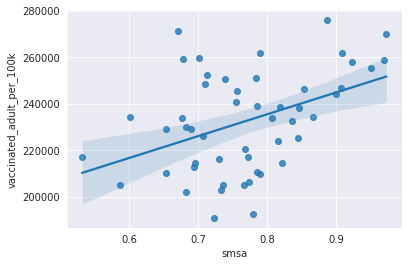

In [ ]:
# Lav en visualisering: "smsa" vs "vaccinated_adult_per_100k" med et seaborn regplot 
# (sns.regplot funktion - udviddet scatterplot) på delstatsniveau
sns.regplot(x = means_by_state['smsa'], y = means_by_state['vaccinated_adult_per_100k'])

Fortolk korrelation og din visualisering Der er moderat positiv ssammenhæng mellem vaccinetilslutning og andel af observationer af dem, der arbejder i  urbane områder på delstatsniveau.